# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [2]:
df = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/albumin_cleaned_7.csv')

In [3]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [4]:
df.head()

sex  ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1    1                 0                   1            2.0    6   
1    1    0                 0                   0            3.0    2   
2    1    0                 0                   0            2.0    3   
3    1    1                 0                   1            1.0    1   
4    1    0                 0                   0            2.0   10   

   albumin_24hrs  5_percent_albumin  25_percent_albumin  unknown_albumin_type  \
0            0.0                0.0                 0.0                   1.0   
1            0.0                0.0                 1.0                   0.0   
2            0.0                0.0                 1.0                   0.0   
3            0.0                1.0                 1.0                   1.0   
4            0.0                0.0                 1.0                   0.0   

   MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  alb_diff  \
0  11.0      1          0             1            0       0.3   
1   9.0      0          1             0            0       0.3   
2  18.0      3          0             1            0       2.0   
3   7.0      2          0             1            0       0.5   
4  11.0      0          0             0            0       1.5   

   30_day_mortality  30_day_readmission  days_until_readmission  LOS_days  \
0                 0                   0                       2         2   
1                 0                   0                       2         1   
2                 0                   0                       2         2   
3                 0                   0                       2         2   
4                 0                   0                       1         2   

   total_ICU_LOS_days  
0                   2  
1                   0  
2                   0  
3                   2  
4                   0

In [5]:
df.shape

(3306, 21)

In [6]:
df.drop(columns=['sex'], inplace=True)

In [7]:
df.drop(columns=['30_day_readmission', '30_day_mortality', 'days_until_readmission', 'total_ICU_LOS_days'], inplace=True)

In [8]:
df.describe()

ICU  mass_transfusion  total_transfusions  anemia_status  \
count  3306.000000       3306.000000         3306.000000    3306.000000   
mean      0.245614          0.032063            0.768603       2.150938   
std       0.430516          0.176194            1.171520       0.913122   
min       0.000000          0.000000            0.000000       0.000000   
25%       0.000000          0.000000            0.000000       2.000000   
50%       0.000000          0.000000            0.000000       2.000000   
75%       0.000000          0.000000            1.000000       3.000000   
max       1.000000          1.000000            7.000000       3.000000   

               CCI  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
count  3306.000000    3306.000000        3306.000000         3306.000000   
mean      4.166364       0.134906           0.076528            0.174229   
std       2.710795       0.341675           0.265881            0.379363   
min       0.000000       0.000000           0.000000            0.000000   
25%       2.000000       0.000000           0.000000            0.000000   
50%       4.000000       0.000000           0.000000            0.000000   
75%       6.000000       0.000000           0.000000            0.000000   
max      17.000000       1.000000           1.000000            1.000000   

       unknown_albumin_type         MELD        qSOFA    Cirrhosis  \
count           3306.000000  3306.000000  3306.000000  3306.000000   
mean               0.152753    14.256431     0.562613     0.333031   
std                0.359803     7.976548     0.724655     0.471369   
min                0.000000     6.000000     0.000000     0.000000   
25%                0.000000     8.000000     0.000000     0.000000   
50%                0.000000    11.000000     0.000000     0.000000   
75%                0.000000    19.000000     1.000000     1.000000   
max                1.000000    40.000000     3.000000     1.000000   

       beta_blocker  hemorrhagic     alb_diff     LOS_days  
count   3306.000000  3306.000000  3306.000000  3306.000000  
mean       0.379915     0.084694     0.343987     0.845433  
std        0.485439     0.278469     0.325461     0.826200  
min        0.000000     0.000000     0.050000     0.000000  
25%        0.000000     0.000000     0.100000     0.000000  
50%        0.000000     0.000000     0.200000     1.000000  
75%        1.000000     0.000000     0.400000     2.000000  
max        1.000000     1.000000     3.100000     2.000000

## Modeling

In [9]:
# establish target feature, LOS_days, as y feature
y = df['LOS_days']
# drop target feature from features dataframe
X = df.drop(columns = ['LOS_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [10]:
cols

Index(['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI',
       'albumin_24hrs', '5_percent_albumin', '25_percent_albumin',
       'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker',
       'hemorrhagic', 'alb_diff'],
      dtype='object')

## Standardize Data

In [11]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [12]:
X.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    0                 0                   0            3.0    2   
2    0                 0                   0            2.0    3   
3    1                 0                   1            1.0    1   
4    0                 0                   0            2.0   10   

   albumin_24hrs  5_percent_albumin  25_percent_albumin  unknown_albumin_type  \
0            0.0                0.0                 0.0                   1.0   
1            0.0                0.0                 1.0                   0.0   
2            0.0                0.0                 1.0                   0.0   
3            0.0                1.0                 1.0                   1.0   
4            0.0                0.0                 1.0                   0.0   

   MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  alb_diff  
0  11.0      1          0             1            0       0.3  
1   9.0      0          1             0            0       0.3  
2  18.0      3          0             1            0       2.0  
3   7.0      2          0             1            0       0.5  
4  11.0      0          0             0            0       1.5

## Train Test Split

In [13]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [14]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

Feature: ICU Score: -0.02690
Feature: mass_transfusion Score: -0.18279
Feature: total_transfusions Score: 0.00280
Feature: anemia_status Score: 0.19823
Feature: CCI Score: -0.07531
Feature: albumin_24hrs Score: 0.76775
Feature: 5_percent_albumin Score: -0.36050
Feature: 25_percent_albumin Score: -0.86048
Feature: unknown_albumin_type Score: -1.00077
Feature: MELD Score: -0.02058
Feature: qSOFA Score: -0.19057
Feature: Cirrhosis Score: 0.34758
Feature: beta_blocker Score: -0.08867
Feature: hemorrhagic Score: -0.45951
Feature: alb_diff Score: -0.23750


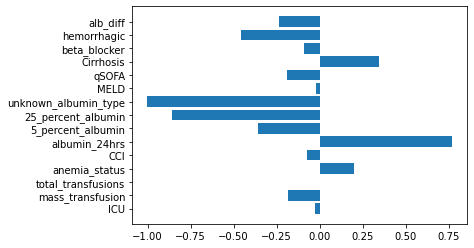

In [15]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                      Importance
albumin_24hrs           2.154918
Cirrhosis               1.415634
anemia_status           1.219248
total_transfusions      1.002807
MELD                    0.979631
ICU                     0.973457
CCI                     0.927454
beta_blocker            0.915149
mass_transfusion        0.832943
qSOFA                   0.826485
alb_diff                0.788598
5_percent_albumin       0.697327
hemorrhagic             0.631594
25_percent_albumin      0.422957
unknown_albumin_type    0.367595


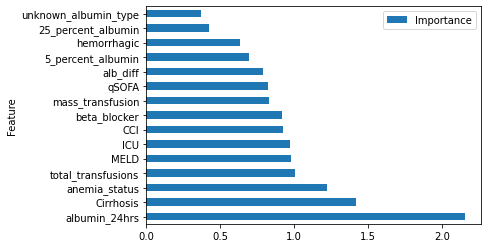

In [16]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [17]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [18]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[974  93  80]
 [484 131 153]
 [303  70 356]]


In [19]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67      1147
           1       0.45      0.17      0.25       768
           2       0.60      0.49      0.54       729

    accuracy                           0.55      2644
   macro avg       0.53      0.50      0.49      2644
weighted avg       0.54      0.55      0.51      2644



In [20]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[224  23  29]
 [127  32  44]
 [ 70  24  89]]


In [21]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.53      0.81      0.64       276
           1       0.41      0.16      0.23       203
           2       0.55      0.49      0.52       183

    accuracy                           0.52       662
   macro avg       0.50      0.49      0.46       662
weighted avg       0.50      0.52      0.48       662



## Decision Tree with all (16) independent vars

In [22]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=5)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Feature: ICU Score: 0.00000
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.00799
Feature: anemia_status Score: 0.04319
Feature: CCI Score: 0.08004
Feature: albumin_24hrs Score: 0.12611
Feature: 5_percent_albumin Score: 0.00000
Feature: 25_percent_albumin Score: 0.16383
Feature: unknown_albumin_type Score: 0.33483
Feature: MELD Score: 0.11132
Feature: qSOFA Score: 0.03065
Feature: Cirrhosis Score: 0.03968
Feature: beta_blocker Score: 0.00962
Feature: hemorrhagic Score: 0.00000
Feature: alb_diff Score: 0.05274


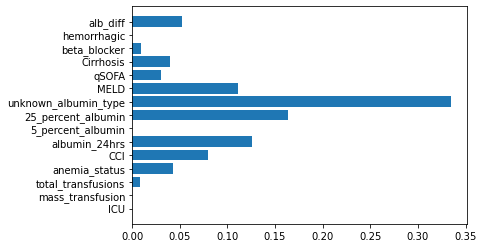

In [23]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [24]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [25]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1049   64   34]
 [ 556  155   57]
 [ 375  100  254]]


In [26]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.53      0.91      0.67      1147
           1       0.49      0.20      0.29       768
           2       0.74      0.35      0.47       729

    accuracy                           0.55      2644
   macro avg       0.58      0.49      0.48      2644
weighted avg       0.57      0.55      0.50      2644



In [27]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[244  19  13]
 [144  34  25]
 [103  25  55]]


In [28]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.50      0.88      0.64       276
           1       0.44      0.17      0.24       203
           2       0.59      0.30      0.40       183

    accuracy                           0.50       662
   macro avg       0.51      0.45      0.43       662
weighted avg       0.50      0.50      0.45       662



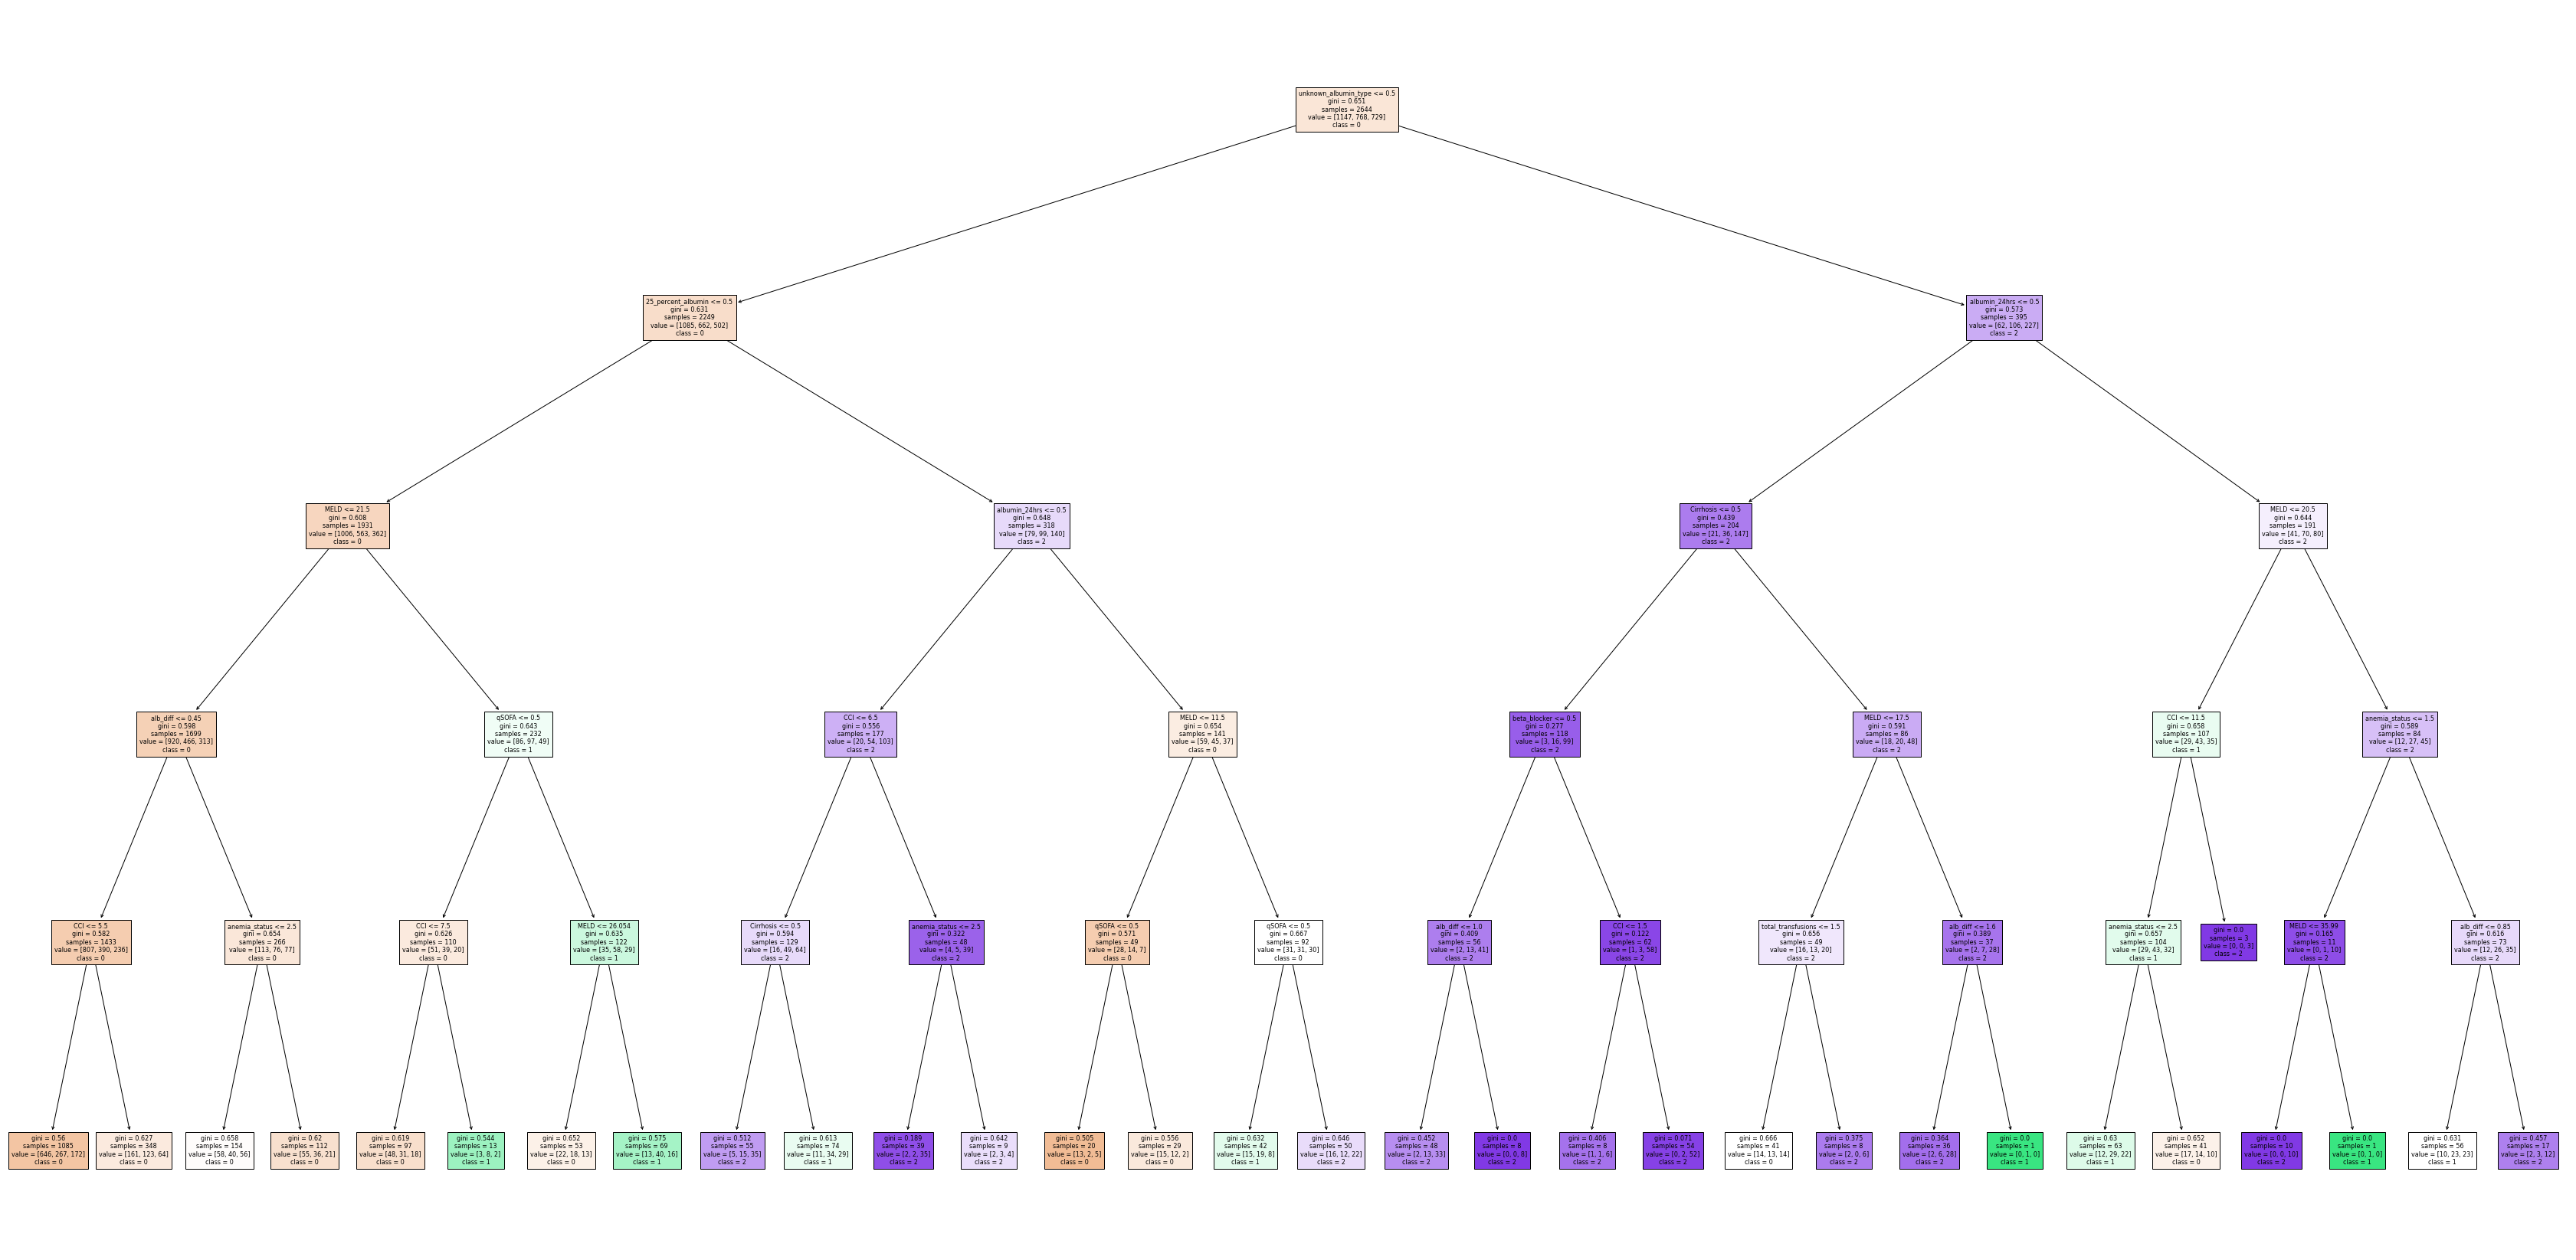

In [29]:
feature_names = df.columns.tolist()
class_names = ['0', '1', '2']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

## Decision Tree with 5 selected vars

In [38]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
X_train1 = X_train[['Cirrhosis', 'qSOFA', 'MELD', 'albumin_24hrs', 'alb_diff']]
X_test1 = X_test[['Cirrhosis', 'qSOFA', 'MELD', 'albumin_24hrs', 'alb_diff']]
dt.fit(X_train1, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: Cirrhosis Score: 0.02960
Feature: qSOFA Score: 0.05215
Feature: MELD Score: 0.39975
Feature: albumin_24hrs Score: 0.00574
Feature: alb_diff Score: 0.51275


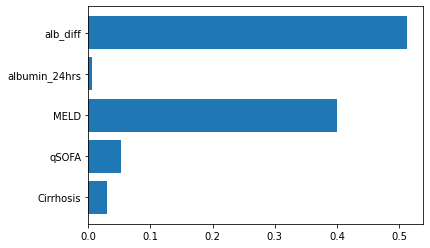

In [39]:
cols = X_train1.columns
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [40]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train1)
y_hat_test = dt.predict(X_test1)

In [41]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[956  58 133]
 [522  95 151]
 [417  54 258]]


In [42]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.50      0.83      0.63      1147
           1       0.46      0.12      0.19       768
           2       0.48      0.35      0.41       729

    accuracy                           0.50      2644
   macro avg       0.48      0.44      0.41      2644
weighted avg       0.48      0.50      0.44      2644



In [43]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[227  16  33]
 [138  25  40]
 [110  19  54]]


In [44]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.48      0.82      0.60       276
           1       0.42      0.12      0.19       203
           2       0.43      0.30      0.35       183

    accuracy                           0.46       662
   macro avg       0.44      0.41      0.38       662
weighted avg       0.44      0.46      0.41       662



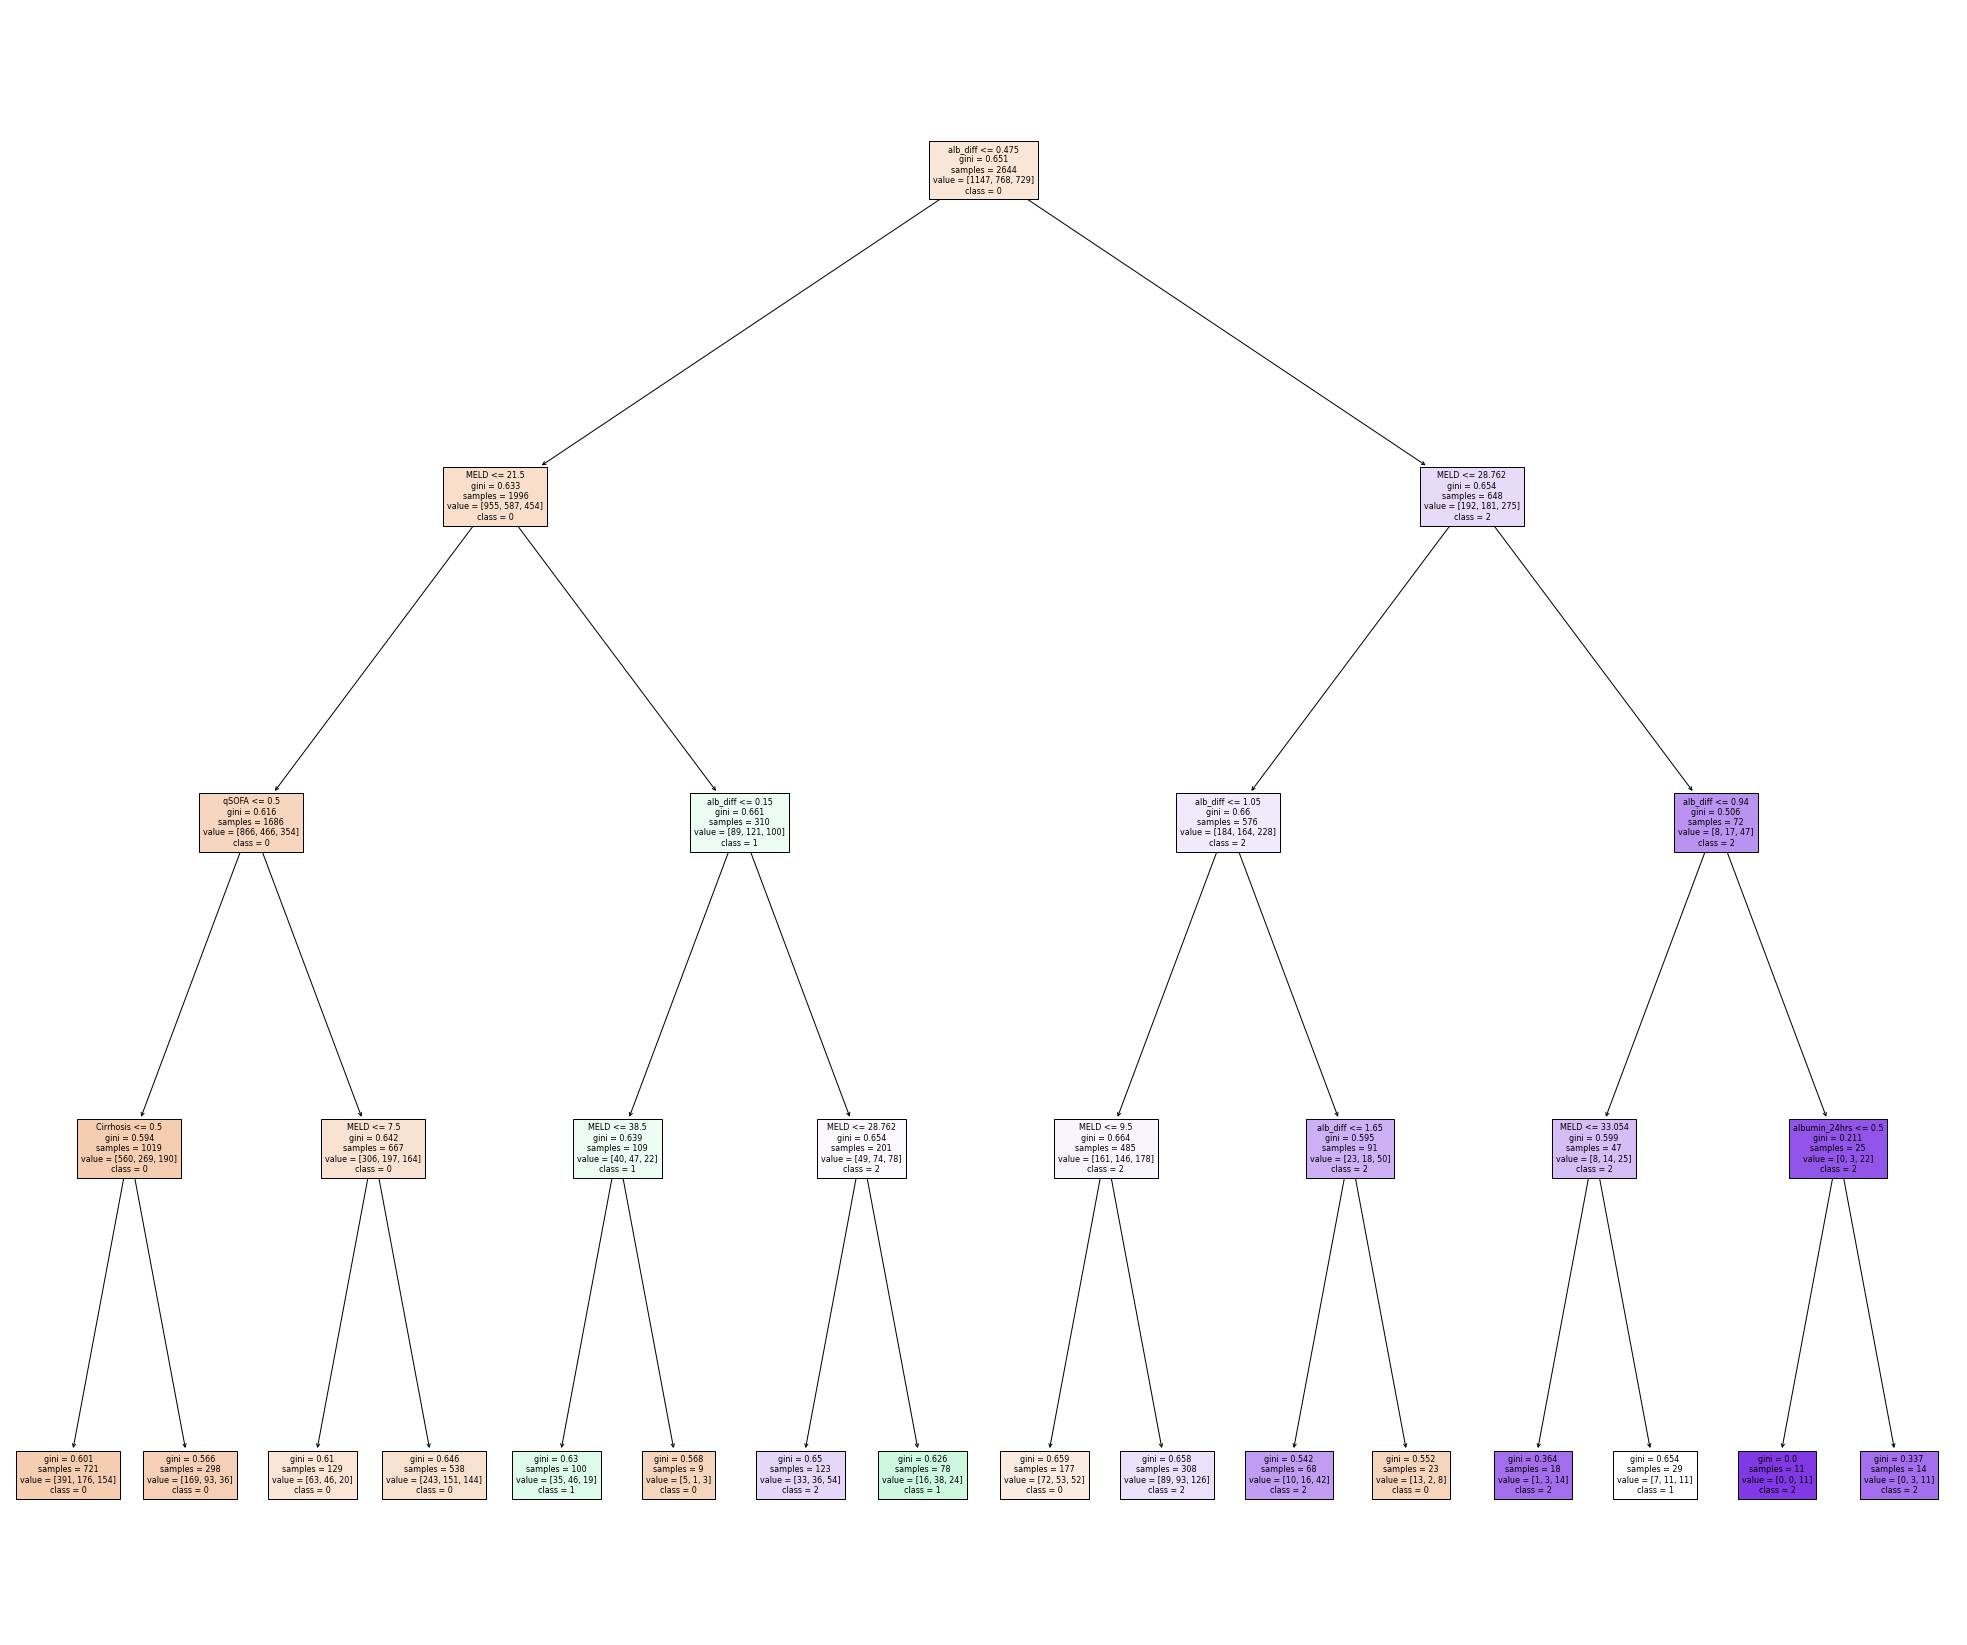

In [45]:
feature_names = X_train1.columns.tolist()
class_names = ['0', '1', '2']

fig = plt.figure(figsize=(35,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)